<a href="https://colab.research.google.com/github/jdy5294/All_Deep_Learning/blob/main/Code/CH21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21장 설명 가능한 딥러닝 모델 만들기

## 2. 설명 가능한 딥러닝의 실행

In [ ]:
!pip install tf-explain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.4 MB/s eta 0:00:00


1. CAM (Class Activation Map): 딥러닝의 중간 과정에서 나온 특징 맵 이용
2. Gradient CAM: CAM에서 평균값 대신 기울기 이용
3. Occlusion Sensitivity (폐쇄성 민감도): 일부를 가리면서 가려진 부분이 결과에 얼마나 영향을 미치는지 계산

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Receiving objects: 100% (21/21), 460.95 KiB | 1.78 MiB/s, done.
Resolving deltas: 100% (3/3), done.


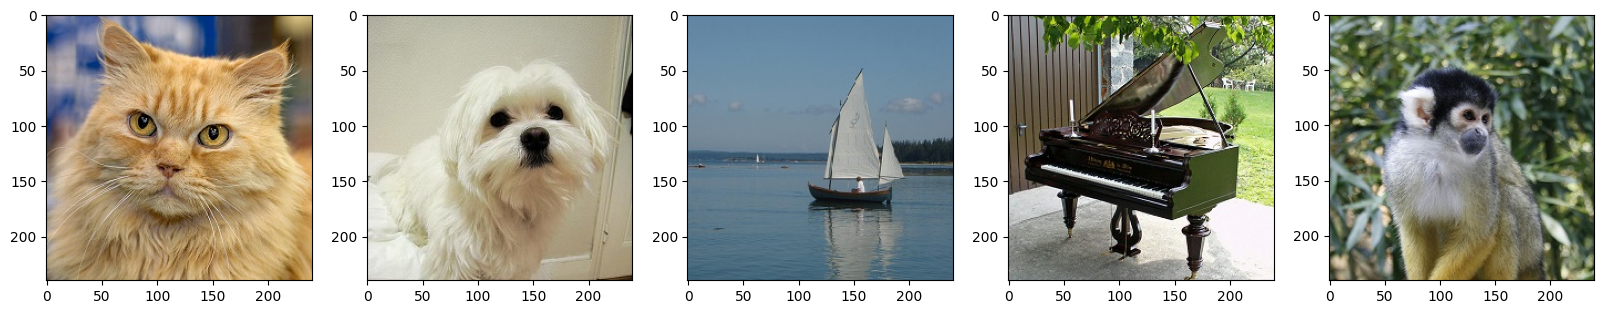

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!git clone https://github.com/taehojo/data.git

images_originals = []

for img_path in glob.glob('./data/img/*_0.jpg'):
    images_originals.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))

for i, image_o in enumerate(images_originals):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_o)

553467096/553467096 [==============================] - 21s 0us/step


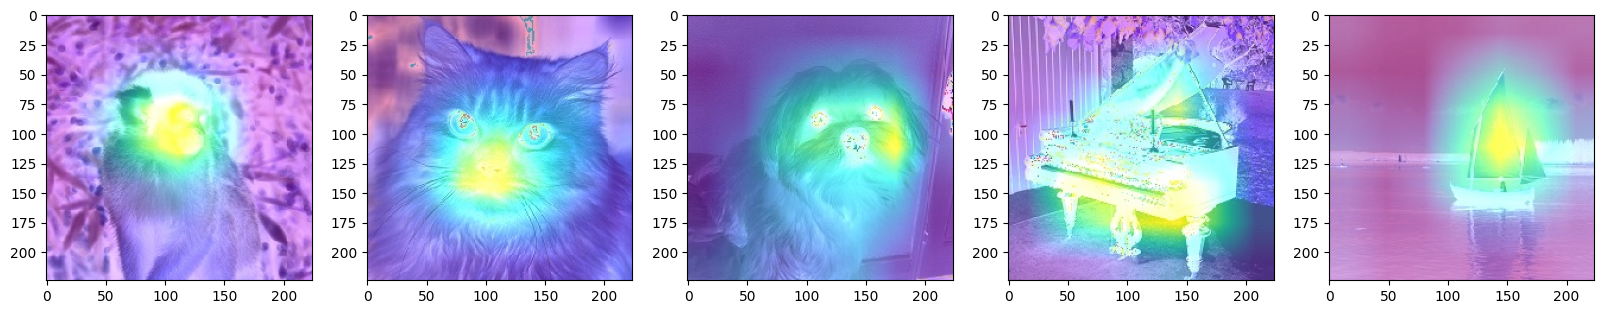

In [ ]:
model = VGG16(weights="imagenet", include_top=True)

input_list = ["maltese", "persian_cat", "squirrel_monkey", "grand_piano", "yawl"]
imagenet_index = ["153", "283", "382", "579", "914"]

explainer = GradCAM()                                                       # 그래디언트 CAM 알고리즘 선택

images_cams = []

for l, i in zip(input_list, imagenet_index):
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224)) # target_size: 내부에서 처리될 이미지의 크기 설정
    img = img_to_array(img)                                                 # 이미지를 넘파이 배열로 변경
    data = ([img], None)
    grid = explainer.explain(data, model, int(i))                           # 그레이디언트 CAM이 실행 explain(데이터, 모델, 클래스)
    explainer.save(grid, ".", './data/img/{}_cam.jpg'.format(l))            # save(output, 저장될 폴더, 저장될 이름)

plt.figure(figsize=(20,20))

for img_path in glob.glob('./data/img/*_cam.jpg'):
    images_cams.append(mpimg.imread(img_path))

for i, image_c in enumerate(images_cams):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_c)

2/2 [==============================] - 21s 3s/step


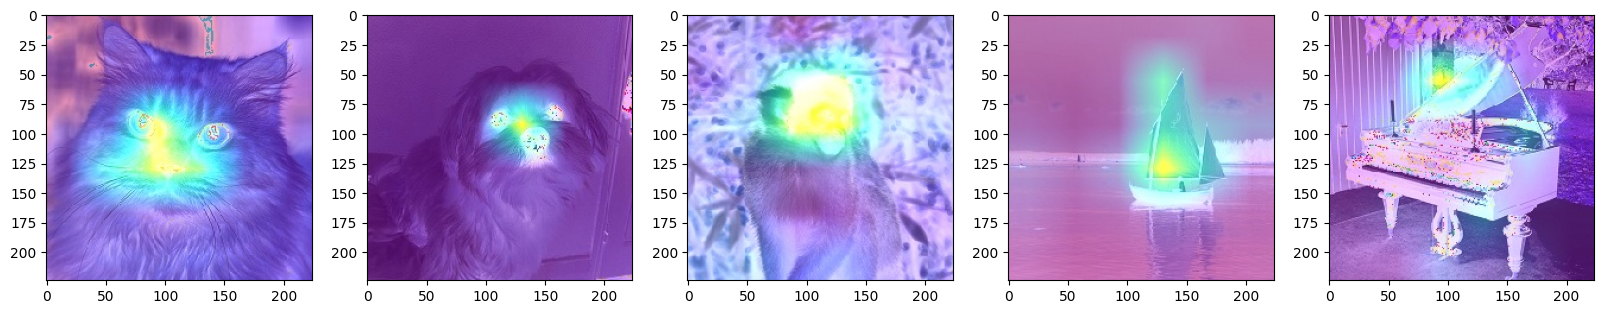

In [ ]:
explainer = OcclusionSensitivity()

images_occ1s = []

patch_size = 40       # 패치 크기: 사진을 가리며 움직이는 검은색 사각형의 크기

for l, i in zip(input_list, imagenet_index):
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224))
    img = img_to_array(img)
    data = ([img], None)
    grid = explainer.explain(data, model, int(i), patch_size) # 패치 사이즈 설정 추가
    explainer.save(grid, ".", './data/img/{}_occ1.jpg'.format(l))

plt.figure(figsize=(20,20))

for img_path in glob.glob('./data/img/*_occ1.jpg'):
    images_occ1s.append(mpimg.imread(img_path))

for i, image in enumerate(images_occ1s):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image)

5/5 [==============================] - 85s 16s/step


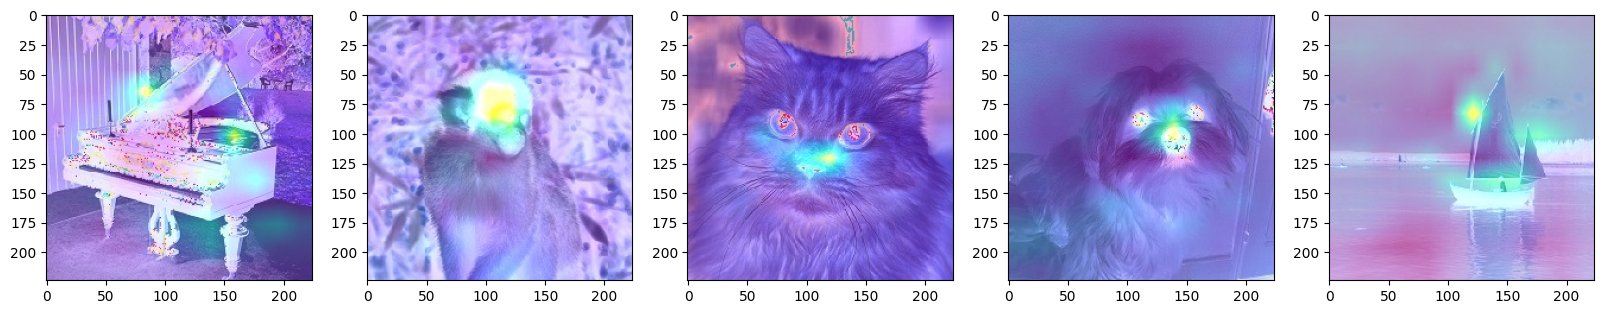

In [ ]:
patch_size = 20

images_occ2s = []

for l, i in zip(input_list, imagenet_index):
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224))
    img = img_to_array(img)
    data = ([img], None)
    grid = explainer.explain(data, model, int(i), patch_size)
    explainer.save(grid, ".", './data/img/{}_occ2.jpg'.format(l))

for img_path in glob.glob('./data/img/*_occ2.jpg'):
    images_occ2s.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
for i, image in enumerate(images_occ2s):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image)


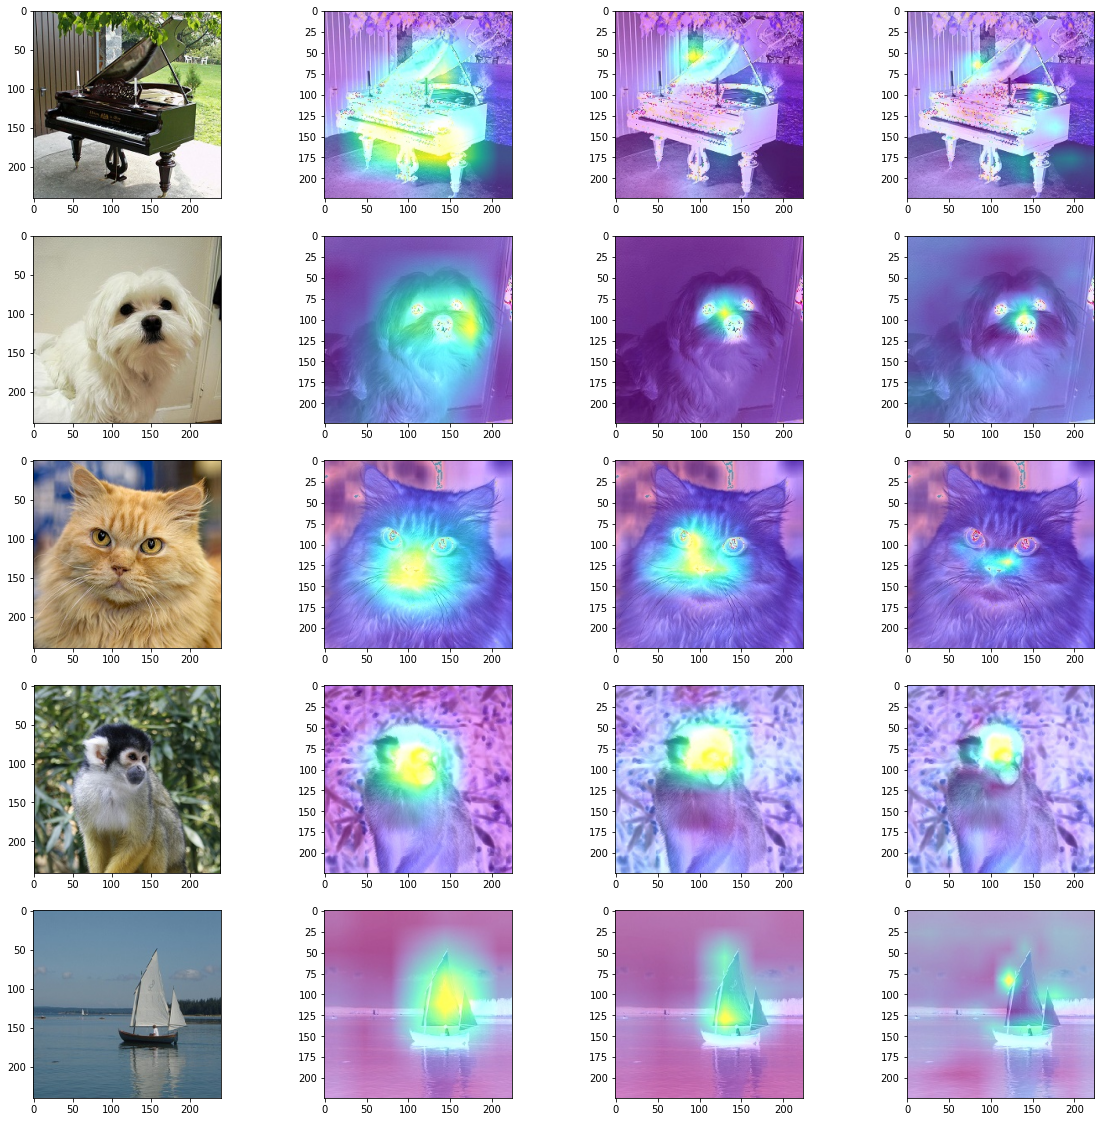

In [ ]:
plt.figure(figsize=(20,20))

images = []
for img_path in glob.glob('./data/img/*.jpg'):
    images.append(mpimg.imread(img_path))

for i, image in enumerate(images):
    plt.subplot(5, 4, i + 1)
    plt.imshow(image)